In [1]:
#사드 배치의 영향으로 중국인 관광객이 얼마나 줄었을까?

In [2]:
#외국인 출입국 통계 데이터 구하기 - 한국관광공사에 나온 기초 자료를 토대로 활용
#https://kto.visitkorea.or.kr/kor/notice/data/statis/profit/notice/inout/popup.kto 에서 19년 1월(월별) 기준으로 가져옴

import pandas as pd #pandas 라이브러리 불러오기
kto_201901 = pd.read_excel(r'C:\Users\82104\Desktop\프로그래밍\파이썬 자료\datasalon-master\02_개정판\4_Tourists_Event\files\kto_201901.xlsx', 
# 상대경로 .(현재 작업 중인 위치)/~~/~~, 그 전 상위 주소는 ../~~/~~
# 절대경로 r'~~\~~\~~' or ~~\\~~\\~~ 으로 표현 가능
                            header = 1, # 두 번째 줄에 있는 것을 변수명으로 가져온다. 
                            usecols = 'A:G', # 전년동기, 성장률, 구성비를 제외한 값들을 가져오기
                            skipfooter = 4 # 맨 아래 4줄은 생략
                            )
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [3]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [4]:
# 데이터 전처리 하기 = 데이터를 탐색하고, 분석에 적합한 과정으로 만들기 == 데이터 가공, 데이터 클렌징, 데이터 핸들링과 같은 의미
# 데이터 변수별로 이상이 있는가? 결측값 처리, 이상치 처리, 변수 정규화, 파생변수 생성

# 정보 보기 R에서는 str()로 표현 
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.5+ KB


In [5]:
#describe() 함수 - R에서 summary 함수와 비슷한 역할
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [6]:
# 0으로 입력된 데이터는 무엇이 있는가? 
print("조건 필터 연산자는 == 으로 표현 ")
condition = (kto_201901['상용'] == 0)  \
            | (kto_201901['관광'] == 0) \
            | (kto_201901['공용'] == 0) \
            | (kto_201901['유학/연수'] == 0) 
kto_201901[condition]


조건 필터 연산자는 == 으로 표현 


,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [7]:
#기준년월 칼럼 생성 - R의 mutate()
kto_201901['기준년월'] = '2019-01'
kto_201901.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [8]:
# 국적이 무엇이 있는가? unique 함수
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [9]:
#대륙 목록 만들기
continents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continents_list


['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [10]:
#대륙 목록에 해당하는 값들은 제외
condition =(kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [11]:
kto_201901_country.head()
# 인덱스(일련번호)의 값이 1부터 시작하는데, 이는 pandas의 데이터에서 적용됨. 파이썬 기본 프레임에서는 0부터 시작

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [12]:
kto_201901_country

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [13]:
#인덱스 초기화하기 -> 0부터 시작하는 일련번호 만들기
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True) 
# reset.index() 함수는 인덱스의 값이 0부터 시작하도록 도와주고, 안의 파라미터 drop은 기존 인덱스 값이 새로운 칼럼으로 생성된다.
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [14]:
#drop을 쓰지 않았을 경우
kto_201901_country_newindex_nodrop = kto_201901_country.reset_index()
kto_201901_country_newindex_nodrop.head()

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,1,일본,198805,2233,127,785,4576,206526,2019-01
1,2,대만,86393,74,22,180,1285,87954,2019-01
2,3,홍콩,34653,59,2,90,1092,35896,2019-01
3,4,마카오,2506,2,0,17,45,2570,2019-01
4,5,태국,34004,37,199,96,6998,41334,2019-01


In [15]:
# 각국별 대륙정보 넣기 - 원본을 살펴보면, 아시아주를 기준으로 나열한 후 미주 오세아니아... 이렇게 흘러가고 있다.
# 각국별 나라 개수는 엑셀의 counta()함수를 이용해서 개수를 구할 수 있음
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 \
    + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [16]:
# 각국별 대륙정보 넣기
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [17]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [18]:
# 국적별 관광객 비율은 어떻게 되는가 - 관광객 비율(%) = 관광객 수[관광]/ 전체 [계] * 100
# 1. 관광객 비율 칼럼 만들기 2. 관광객 비율 계산 3. 출력
kto_201901_country_newindex['관광객비율(%)'] = \
    round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [19]:
# 관광객 비율 높은 순으로 정렬하기
kto_201901_country_newindex.sort_values(by= '관광객비율(%)',ascending= False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [20]:
# 열을 잘못 많이 넣어서 삭제함.. axis 파라미터는 축을 의미한다. axis= 0 은 index=labels와 같고 / axis=1 은 column=labels와 같다고 함
#kto_201901_country_newindex.drop(['관광객 비율','관광객 비율(%)'], axis = 1) 이미 지웠음
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex['대륙'] = continents 
kto_201901_country_newindex['관광객비율(%)'] = \
    round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.sort_values(by= '관광객비율(%)',ascending= False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [21]:
# 오름차순 정렬
kto_201901_country_newindex.sort_values(by = '관광객비율(%)',ascending = True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [22]:
# 대륙별 관광객 비율의 평균 / pivot_table() 함수 활용
kto_201901_country_newindex
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)', #데이터로 사용할 부분
                                        index = '대륙', # 어느 기준으로 구분할 것인가
                                        aggfunc = 'mean') # 어떤 값을 산출할 것인가? 평균(mean)으로 산출
# group_by()
# 통계적 의미 추출
# 아, 관광객 비율이 높은 곳은 오세아니아 대륙이었어 -> 어느정도 소득수준이 낮은 국가는 관광객 비율이 적다

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [23]:
# 중국은 관광객 수와 비율이 어떻게 되는데?
condition = (kto_201901_country_newindex.국적 == '중국')
kto_201901_country_newindex[condition]
# 중국은 우리나라에 관광하러오는 경우가 10명 중 8명이다

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [24]:
# 기준년월별 전체 외국인 관광객 대비 국적별 관광객 비율 보기
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [25]:
# 전체비율 칼럼 생성하기 - 전체비율 = 19년도 1월 국적별 관광객 수 / 전체 관광객수 * 100
kto_201901_country_newindex['전체비율(%)'] = \
    round(kto_201901_country_newindex['관광'] / tourist_sum * 100,1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [26]:
# 어디가 전체비율이 가장 높을까? 일단 지우고
#kto_201901_country_newindex = kto_201901_country_newindex.drop('전체비율',axis =1)
kto_201901_country_newindex.sort_values(by= '전체비율(%)', ascending = False).head()
# 중국이 압도적으로 관광객이 많다는 것을 알 수 있다. 그 다음은 일본 대만... 
# 상위 5위권 개국이 우리나라를 방문한 관광객의 77% 라고 할 수 있다.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [27]:
# 여태까지 해왔던 과정들을 함수로 엮기
def create_kto_data(yy,mm):
    # 1. 불러올 엑셀 파일 경로를 지정
    file_path = r'C:\Users\82104\Desktop\프로그래밍\파이썬 자료\datasalon-master\02_개정판\4_Tourists_Event\files\kto_{}{}.xlsx'.format(yy,mm)

    # 2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols= 'A:G')

    # 3. '기준년월' 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy,mm)

    # 4. '국적' 칼럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] 
    # 제거할 대륙명 정하기
    condition = (df['국적'].isin(ignore_list) == False)
    df_country = df[condition].reset_index(drop = True)

    # 5. '대륙' 칼럼 추가
    continents =['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 \
    + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents

    # 6. 국가별 '관광객비율(%)' 칼럼 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)

    # 7. '전체비율(%)' 칼럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country.관광 / tourist_sum * 100, 1)

    # 8. 결과 출력
    return(df_country)
# 1. 엑셀 파일 경로 file.path -> file_path로 수정
# 2. 파일경로 r'~\~\~'로 수정

In [28]:
kto_test = create_kto_data(2018,12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [29]:
# 여러 엑셀 파일을 불러와서 하나로 합치기 - kto_yyyymm.xlsx의 형태
# kto_yyyymm.xlsx의 형태로 된 파일들이 어떤 것들이 있나?
for yy in range(2010, 2021):
    for mm in range(1, 13):
        yymm = '{}{}'.format(yy,mm)
        print(yy,mm)


2010 1
2010 2
2010 3
2010 4
2010 5
2010 6
2010 7
2010 8
2010 9
2010 10
2010 11
2010 12
2011 1
2011 2
2011 3
2011 4
2011 5
2011 6
2011 7
2011 8
2011 9
2011 10
2011 11
2011 12
2012 1
2012 2
2012 3
2012 4
2012 5
2012 6
2012 7
2012 8
2012 9
2012 10
2012 11
2012 12
2013 1
2013 2
2013 3
2013 4
2013 5
2013 6
2013 7
2013 8
2013 9
2013 10
2013 11
2013 12
2014 1
2014 2
2014 3
2014 4
2014 5
2014 6
2014 7
2014 8
2014 9
2014 10
2014 11
2014 12
2015 1
2015 2
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8
2015 9
2015 10
2015 11
2015 12
2016 1
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


In [30]:
mm = 1
print(mm)

1


In [31]:
#zfill()함수 - 문자열에 적용하는 함수. 괄호안의 숫자만큼 0을 채워서 자릿수를 채워줌
print(str(mm).zfill(2))
print(str(mm).zfill(3))
print(str(mm).zfill(4))

01
001
0001


In [32]:
# for문의 이해 - for 변수 in 리스트(또는 튜플, 문자열)
for yy in range(2010,2021):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2)
        yymm='{}{}'.format(yy,mm_str)
        print(yymm)


201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [33]:
# 데이터를 담을 빈 데이터 프레임 만들기
df = pd.DataFrame()

In [34]:
# 패턴 분석 결과를 이중 반복문을 통해 구현
for yy in range(2010,2021): # 2010~2020까지 반복
    for mm in range(1,13): # 1~12까지 반복
# try/except 구문을 실행하지 않으면 오류가 발생
        try:
            # 앞에서 만든 create_kto_data 함수로 엑셀 데이터를 temp에 넣기
            temp = create_kto_data(str(yy),str(mm).zfill(2))
            # temp로 불러온 데이터를 df로 추가
            df = df.append(temp,ignore_index = True)
        # try 구문에서 오류가 발생하면 생략할 수 있도록 하는 except 이후 실행
        except:
            pass

In [35]:
# 기준년월 = 2010년 1월
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [36]:
# 기준년월 2020년 10월
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7855,대양주 기타,1,0,0,0,29,30,2020-11,오세아니아,3.3,0.0
7856,남아프리카공화국,5,2,1,1,85,94,2020-11,아프리카,5.3,0.0
7857,아프리카 기타,48,60,15,54,527,704,2020-11,아프리카,6.8,0.4
7858,국적미상,1,0,0,0,0,1,2020-11,기타대륙,100.0,0.0
7859,교포,0,0,0,0,1085,1085,2020-11,교포,0.0,0.0


In [37]:
condition1 = (df['기준년월'] == '2020-04')
df[condition1]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7380,일본,58,53,2,49,198,360,2020-04,아시아,16.1,1.1
7381,대만,48,8,0,12,87,155,2020-04,아시아,31.0,0.9
7382,홍콩,17,2,0,8,8,35,2020-04,아시아,48.6,0.3
7383,마카오,1,0,0,0,0,1,2020-04,아시아,100.0,0.0
7384,태국,107,1,7,5,179,299,2020-04,아시아,35.8,2.1
7385,말레이시아,29,1,0,61,61,152,2020-04,아시아,19.1,0.6
7386,필리핀,438,1,5,6,680,1130,2020-04,아시아,38.8,8.5
7387,인도네시아,572,2,5,83,1202,1864,2020-04,아시아,30.7,11.1
7388,싱가포르,17,5,3,3,20,48,2020-04,아시아,35.4,0.3
7389,미얀마,41,1,0,33,688,763,2020-04,아시아,5.4,0.8


In [38]:
# 불러온 df 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7860 non-null   object 
 1   관광        7860 non-null   int64  
 2   상용        7860 non-null   int64  
 3   공용        7860 non-null   int64  
 4   유학/연수     7860 non-null   int64  
 5   기타        7860 non-null   int64  
 6   계         7860 non-null   int64  
 7   기준년월      7860 non-null   object 
 8   대륙        7860 non-null   object 
 9   관광객비율(%)  7860 non-null   float64
 10  전체비율(%)   7860 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 583.4+ KB


In [39]:
# 엑셀 파일로 데이터 저장하기
df.to_excel(r'C:\Users\82104\Desktop\프로그래밍\파이썬 자료\datasalon-master\02_개정판\4_Tourists_Event\files\kto_total.xlsx', index= False)

In [40]:
# 데이터 시각화 하기
import pandas as pd
df = pd.read_excel(r'C:\Users\82104\Desktop\프로그래밍\파이썬 자료\datasalon-master\02_개정판\4_Tourists_Event\files\kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [41]:
# 그래프에서 한글을 표기하기 위한 글꼴 처리 (윈도우,macOS)
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font',family = font_name)
elif platform.system == 'Darwin':
    rc('font',family = 'AppleGotic')
else:
    print('Check your OS system')

In [42]:
# matplotlib 라이브러리 불러오기
import matplotlib.pyplot as plt


In [43]:
# 중국만 필터링 해서 불러오기
condition = (df['국적'] =='중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


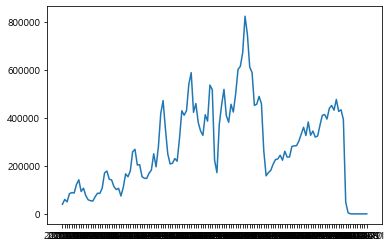

In [44]:
# 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.show()
# plot의 첫번째 값에서는 x축으로, 두번째 값은 y축으로 지정됨

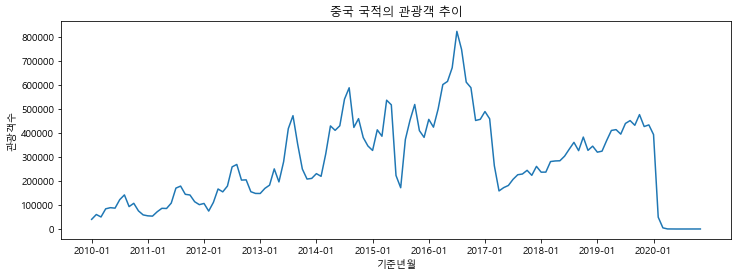

In [45]:
# 그래프 크기 조정하기
plt.figure(figsize= (12,4)) # 가로 12인치, 세로 4인치의 그래프

# 그래프 내용 설정
plt.plot(df_filter['기준년월'],df_filter['관광'])

# 그래프 타이틀과 x축, y축 이름달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금 값 설정하기 - 그래프에 표시할 x축의 눈금 값 지정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01']) 
plt.yticks([0,100000,200000,300000,400000,500000,600000,700000,800000])
# y축 눈금 값은 정수 이기 때문에 문자로 구성되는 ''을 생략해서 넣어야 함

# 그래프 표현
plt.show()

In [46]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 작성
cntry_list = ['중국','일본','대만','미국','홍콩']


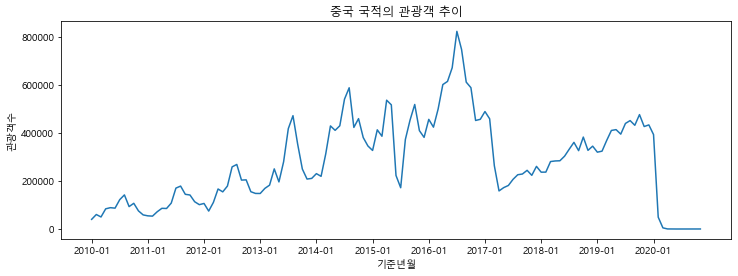

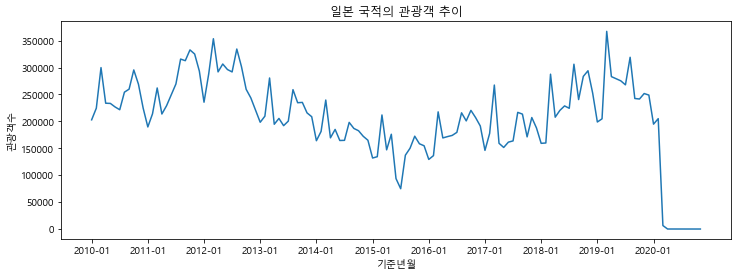

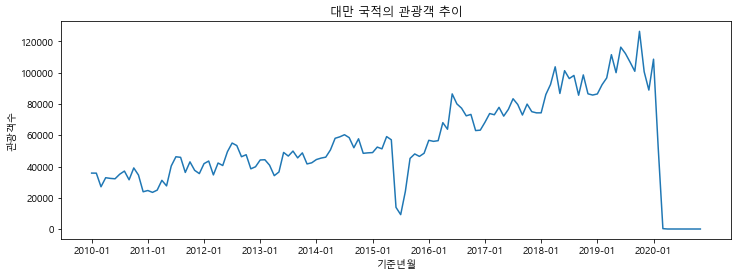

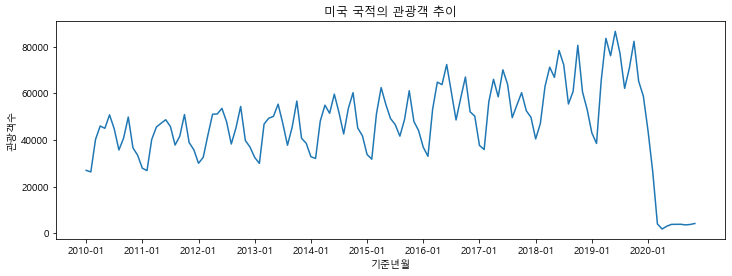

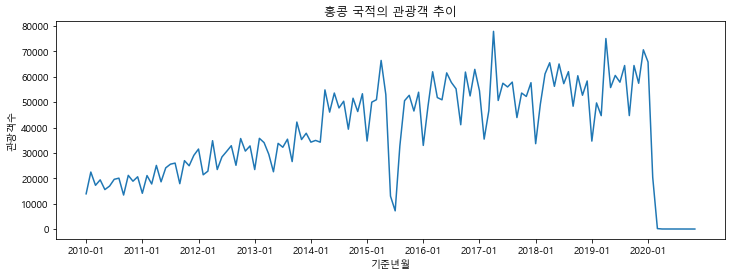

In [47]:
# 반복문으로 그래프 그리기
for cntry in cntry_list:
    # 상위 5개 국적 관광객만 추출하기
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 및 조절
    plt.figure(figsize= (12, 4))

    # 그래프 내용 설정
    plt.plot(df_filter['기준년월'],df_filter['관광'])

    # 그래프 타이틀, x축, y축 제목 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    # x축, y축 눈금값 설정 
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'])
    # 오류가 여러가지가 났었음. 
    # 1. 그래프 내용 설정이 책에는 되어 있지 않았었음 2. invaild syntax error - 모르겠다 3. 열맞춤 안해서 그런가?

    # 그래프 출력
    plt.show()

In [48]:
# 히트맵 그래프 그리기 - 매트릭스 형태에 포함된 각 값을 컬러로 표현하는 시각화 방법
df.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [49]:
# str.slice() 함수를 이용한 연도,월 칼럼 만들기
df['년도'] = df['기준년월'].str.slice(0,4) # 0~3번째 글자 추출
df['월'] = df['기준년월'].str.slice(5,7) # 5~6번째 글자 추출
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [50]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [51]:
# pivot_table() 함수 이용하기
df_pivot = df_filter.pivot_table(values = '관광', \
    index= '년도', columns= '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [52]:
# 히트맵 그래프 그리기 위한 라이브러리 부르기
import matplotlib.pyplot as plt 
import seaborn as sns


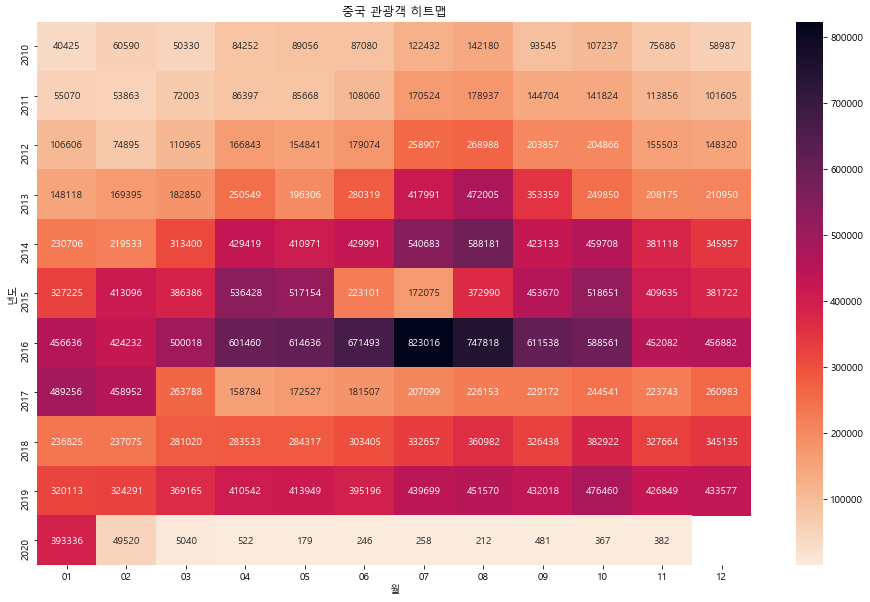

In [53]:
# 그래프 크기 설정
plt.figure(figsize = (16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
# sns.heatmap(그래프로 나타낼 데이터, annot = 히트맵 그래프의 각 칸에 실제 값 표시, fmt = 숫자형태를 소수점이 없는 실수형 반환, cmap = 그래프의 색깔 조합 지정)

# 그래프 타이틀
plt.title('중국 관광객 히트맵')

# 그래프 표현
plt.show()

In [54]:
cntry_list = ['중국' , '일본' , '대만' , '미국', '홍콩' ]
#conditions =  (df['국적'] == cntry_list) 
#ValueError: ('Lengths must match to compare', (7800,), (5,))
#cntry_list를 'cntry_list'로 변경 목록 값만 나오는 오류 발생
conditions = df['국적'].isin(cntry_list)
#isin()을 통하여 조건문 달성

df[conditions]


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,일본,32,244,4,261,713,1254,2020-11,아시아,2.6,0.3,2020,11
7801,대만,42,42,1,62,152,299,2020-11,아시아,14.0,0.4,2020,11
7802,홍콩,3,8,1,59,18,89,2020-11,아시아,3.4,0.0,2020,11
7817,중국,382,327,5,1285,7175,9174,2020-11,아시아,4.2,3.3,2020,11


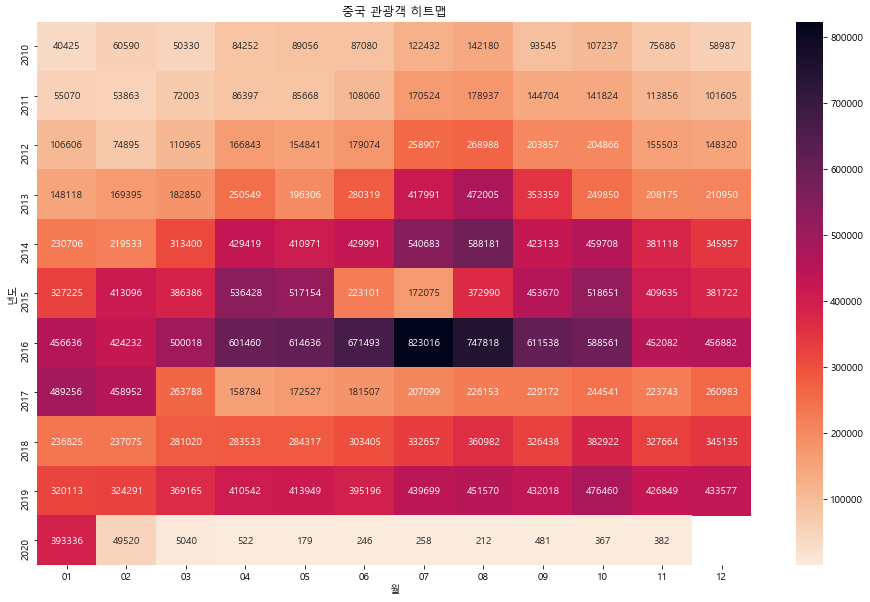

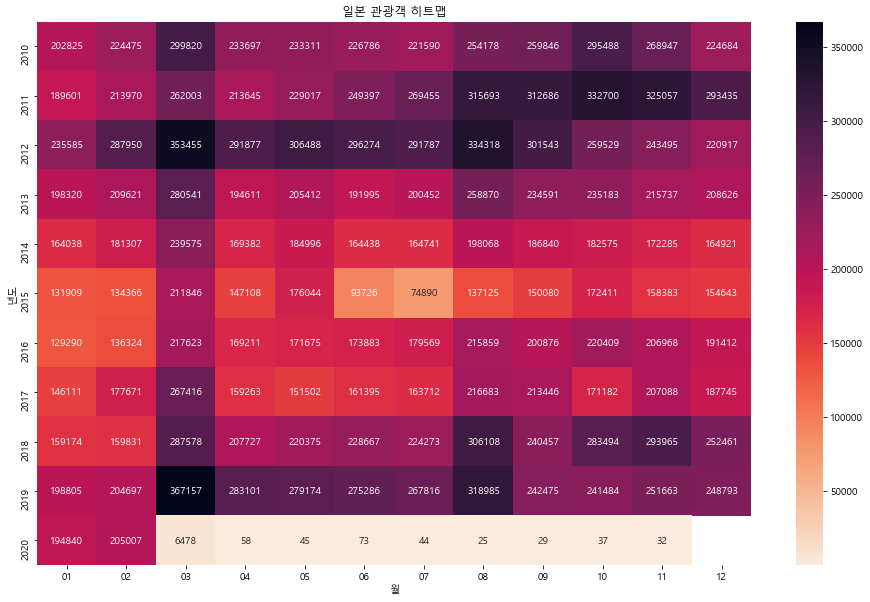

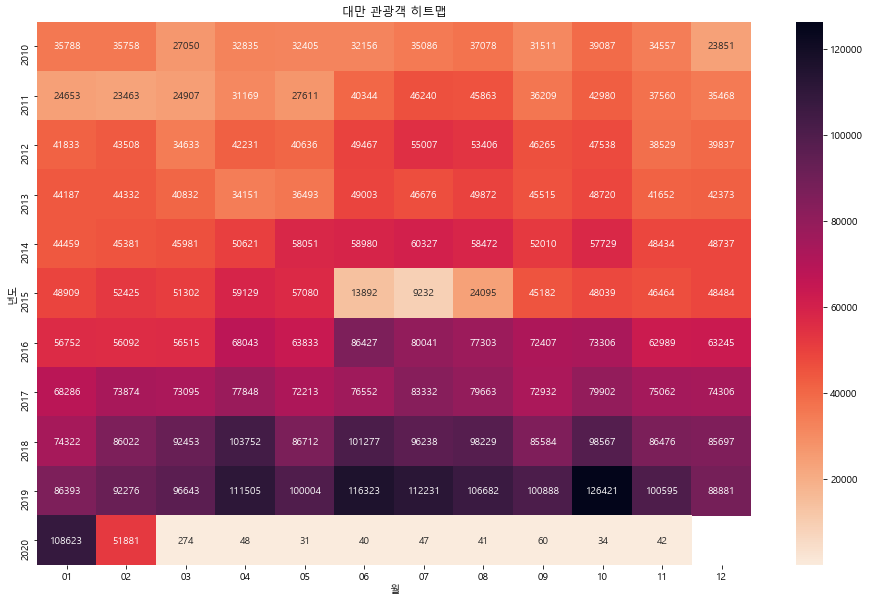

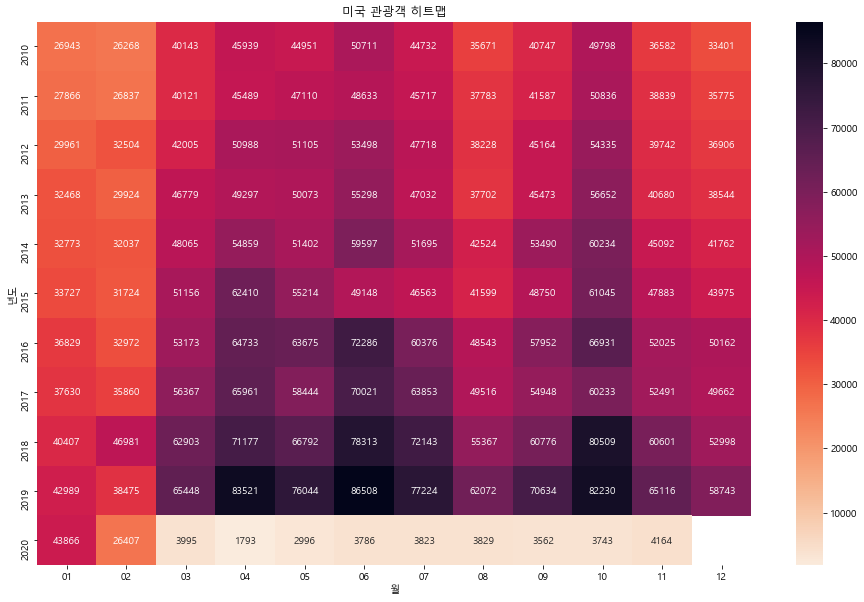

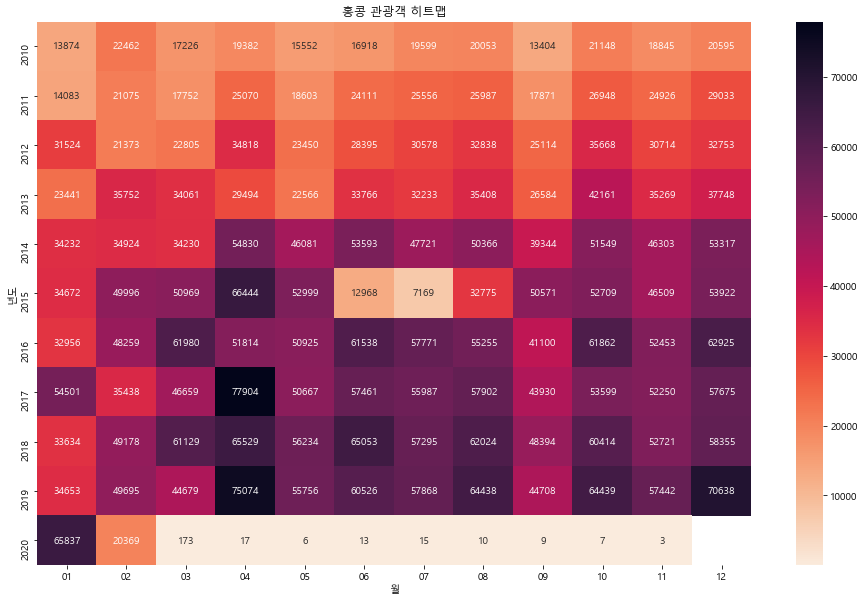

In [55]:
# 반복문으로 상위 5개국에 대한 히트맵 그리기
for cntry in cntry_list:
    conditions = (df['국적'] == cntry)
    #conditions = df['국적'].isin(cntry)
    df_filter = df[conditions]

    df_pivots = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')

    plt.figure(figsize= (16,10))

    sns.heatmap(df_pivots, annot = True, fmt = '.0f', cmap ='rocket_r')

    plt.title('{} 관광객 히트맵'.format(cntry))

    plt.show()
    # 오류 1. TypeError: 'DataFrame' object is not callable
    # 오류 2. KeyError: '년도'

In [56]:
# 인사이트 도출하기
1. 2010 ~ 2016년 까지는 중국인 관광객이 많아짐
2. 특히, 여름 계절 동안에는 당해년도에 비해 많은 것을 알 수 있음
3. 15년도 중순과 17년도 중순은 어떠한 사건이 있어 감소를 했다
4. 20년도 3월 부터 급격히 관광객 인구 감소

SyntaxError: invalid syntax (<ipython-input-56-5ea4b1ae12a4>, line 2)